In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set visual theme
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
sentiment_df = pd.read_csv('/content/drive/MyDrive/Primetrade.ai/fear_greed_index.csv')
trades_df = pd.read_csv('/content/drive/MyDrive/Primetrade.ai/historical_data.csv')

In [5]:
# Describe the dataframes
print("Sentiment Dataframe Description:")
display(sentiment_df.info())
display(sentiment_df.describe(include='all'))

print("\nTrades Dataframe Description:")
display(trades_df.info())
display(trades_df.describe(include='all'))


Sentiment Dataframe Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


None

,timestamp,value,classification,date
count,2.644000e+03,2644.000000,2644,2644
unique,NaN,NaN,5,2644
top,NaN,NaN,Fear,2025-05-02
freq,NaN,NaN,781,1
mean,1.631899e+09,46.981089,NaN,NaN
std,6.597967e+07,21.827680,NaN,NaN
min,1.517463e+09,5.000000,NaN,NaN
25%,1.574811e+09,28.000000,NaN,NaN
50%,1.631900e+09,46.000000,NaN,NaN
75%,1.688989e+09,66.000000,NaN,NaN



Trades Dataframe Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  fl

None

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
count,211224,211224,211224.000000,2.112240e+05,2.112240e+05,211224,211224,2.112240e+05,211224,211224.000000,211224,2.112240e+05,211224,211224.000000,2.112240e+05,2.112240e+05
unique,32,246,NaN,NaN,NaN,2,27977,NaN,12,NaN,101184,NaN,2,NaN,NaN,NaN
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,NaN,NaN,NaN,SELL,14-02-2025 00:31,NaN,Open Long,NaN,0x00000000000000000000000000000000000000000000...,NaN,True,NaN,NaN,NaN
freq,40184,68005,NaN,NaN,NaN,108528,441,NaN,49895,NaN,9032,NaN,128403,NaN,NaN,NaN
mean,NaN,NaN,11414.723350,4.623365e+03,5.639451e+03,NaN,NaN,-2.994625e+04,NaN,48.749001,NaN,6.965388e+10,NaN,1.163967,5.628549e+14,1.737744e+12
std,NaN,NaN,29447.654868,1.042729e+05,3.657514e+04,NaN,NaN,6.738074e+05,NaN,919.164828,NaN,1.835753e+10,NaN,6.758854,3.257565e+14,8.689920e+09
min,NaN,NaN,0.000005,8.740000e-07,0.000000e+00,NaN,NaN,-1.433463e+07,NaN,-117990.104100,NaN,1.732711e+08,NaN,-1.175712,0.000000e+00,1.680000e+12
25%,NaN,NaN,4.854700,2.940000e+00,1.937900e+02,NaN,NaN,-3.762311e+02,NaN,0.000000,NaN,5.983853e+10,NaN,0.016121,2.810000e+14,1.740000e+12
50%,NaN,NaN,18.280000,3.200000e+01,5.970450e+02,NaN,NaN,8.472793e+01,NaN,0.000000,NaN,7.442939e+10,NaN,0.089578,5.620000e+14,1.740000e+12
75%,NaN,NaN,101.580000,1.879025e+02,2.058960e+03,NaN,NaN,9.337278e+03,NaN,5.792797,NaN,8.335543e+10,NaN,0.393811,8.460000e+14,1.740000e+12


## Data Preprocessing


In [6]:
# Step 3: Preprocessing - Standardize Column Names
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower().str.replace(" ", "_")
trades_df.columns = trades_df.columns.str.strip().str.lower().str.replace(" ", "_")

In [7]:
# Step 4: Parse Dates
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
trades_df['timestamp_ist'] = pd.to_datetime(trades_df['timestamp_ist'], errors='coerce')
trades_df['date'] = trades_df['timestamp_ist'].dt.date

In [8]:
# Step 5: Merge Sentiment into Trades
merged_df = pd.merge(trades_df, sentiment_df[['date', 'classification', 'value']], on='date', how='left')


print("\nMerged Dataframe Description:\n")
display(merged_df.info())
display(merged_df.describe(include='all'))



Merged Dataframe Description:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211224 non-null  object        
 1   coin              211224 non-null  object        
 2   execution_price   211224 non-null  float64       
 3   size_tokens       211224 non-null  float64       
 4   size_usd          211224 non-null  float64       
 5   side              211224 non-null  object        
 6   timestamp_ist     79225 non-null   datetime64[ns]
 7   start_position    211224 non-null  float64       
 8   direction         211224 non-null  object        
 9   closed_pnl        211224 non-null  float64       
 10  transaction_hash  211224 non-null  object        
 11  order_id          211224 non-null  int64         
 12  crossed           211224 non-null  bool          
 13  fee               211224 no

None

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,classification,value
count,211224,211224,211224.000000,2.112240e+05,2.112240e+05,211224,79225,2.112240e+05,211224,211224.000000,211224,2.112240e+05,211224,211224.000000,2.112240e+05,2.112240e+05,79225,35864,35864.00000
unique,32,246,NaN,NaN,NaN,2,NaN,NaN,12,NaN,101184,NaN,2,NaN,NaN,NaN,188,5,NaN
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,NaN,NaN,NaN,SELL,NaN,NaN,Open Long,NaN,0x00000000000000000000000000000000000000000000...,NaN,True,NaN,NaN,NaN,2025-12-03,Fear,NaN
freq,40184,68005,NaN,NaN,NaN,108528,NaN,NaN,49895,NaN,9032,NaN,128403,NaN,NaN,NaN,3968,13869,NaN
mean,NaN,NaN,11414.723350,4.623365e+03,5.639451e+03,NaN,2025-05-01 09:10:16.361502208,-2.994625e+04,NaN,48.749001,NaN,6.965388e+10,NaN,1.163967,5.628549e+14,1.737744e+12,NaN,NaN,51.33496
min,NaN,NaN,0.000005,8.740000e-07,0.000000e+00,NaN,2023-01-05 01:06:00,-1.433463e+07,NaN,-117990.104100,NaN,1.732711e+08,NaN,-1.175712,0.000000e+00,1.680000e+12,NaN,NaN,15.00000
25%,NaN,NaN,4.854700,2.940000e+00,1.937900e+02,NaN,2025-02-02 13:02:00,-3.762311e+02,NaN,0.000000,NaN,5.983853e+10,NaN,0.016121,2.810000e+14,1.740000e+12,NaN,NaN,28.00000
50%,NaN,NaN,18.280000,3.200000e+01,5.970450e+02,NaN,2025-06-02 19:46:00,8.472793e+01,NaN,0.000000,NaN,7.442939e+10,NaN,0.089578,5.620000e+14,1.740000e+12,NaN,NaN,49.00000
75%,NaN,NaN,101.580000,1.879025e+02,2.058960e+03,NaN,2025-10-01 03:49:00,9.337278e+03,NaN,5.792797,NaN,8.335543e+10,NaN,0.393811,8.460000e+14,1.740000e+12,NaN,NaN,72.00000
max,NaN,NaN,109004.000000,1.582244e+07,3.921431e+06,NaN,2025-12-04 23:55:00,3.050948e+07,NaN,135329.090100,NaN,9.014923e+10,NaN,837.471593,1.130000e+15,1.750000e+12,NaN,NaN,90.00000


### Feature Engineering


In [9]:
# 1. Profitability Indicator
merged_df['is_profitable'] = merged_df['closed_pnl'] > 0

# 2. Normalized PnL (profit per dollar traded)
merged_df['normalized_pnl'] = merged_df['closed_pnl'] / (merged_df['size_usd'] + 1e-6)

# 3. PnL Category
def categorize_pnl(pnl):
    if pnl < -10:
        return 'High Loss'
    elif -10 <= pnl < 0:
        return 'Loss'
    elif pnl == 0:
        return 'Breakeven'
    elif 0 < pnl <= 10:
        return 'Profit'
    else:
        return 'High Profit'
merged_df['pnl_category'] = merged_df['closed_pnl'].apply(categorize_pnl)

# 4. Sentiment Score Mapping
sentiment_map = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}
merged_df['sentiment_score'] = merged_df['classification'].map(sentiment_map)


# 5. Interaction Feature: PnL per unit size_tokens
merged_df['pnl_per_token'] = merged_df['closed_pnl'] / (merged_df['size_tokens'] + 1e-6)

# 6. Interaction Feature: Value-weighted PnL
# This feature could represent PnL adjusted by the intensity of sentiment
merged_df['value_weighted_pnl'] = merged_df['closed_pnl'] * merged_df['value']

# 7. Price Change during Trade
# we can look at the ratio of execution price to a baseline if available, or simply log returns
# Since we don't have a clear baseline or subsequent price, we can consider log of execution price as a feature
merged_df['price_change'] = np.log(merged_df['execution_price'] / merged_df['execution_price'].shift(1))

merged_df['log_execution_price'] = np.log(merged_df['execution_price'].replace(0, 1e-6) + 1e-6)


# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numerical features for scaling
numerical_features = ['execution_price', 'size_tokens', 'size_usd', 'start_position',
                      'closed_pnl', 'fee', 'trade_id', 'timestamp',
                      'value', 'normalized_pnl', 'sentiment_score', 'pnl_per_token',
                      'value_weighted_pnl', 'log_execution_price']

# Apply StandardScaler
scaler = StandardScaler()
merged_df[numerical_features] = scaler.fit_transform(merged_df[numerical_features])

# Display updated dataframe info and head to verify
print("\nMerged Dataframe Info After Feature Engineering :\n")
display(merged_df.info())
display(merged_df.head())


Merged Dataframe Info After Feature Engineering :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   account              211224 non-null  object        
 1   coin                 211224 non-null  object        
 2   execution_price      211224 non-null  float64       
 3   size_tokens          211224 non-null  float64       
 4   size_usd             211224 non-null  float64       
 5   side                 211224 non-null  object        
 6   timestamp_ist        79225 non-null   datetime64[ns]
 7   start_position       211224 non-null  float64       
 8   direction            211224 non-null  object        
 9   closed_pnl           211224 non-null  float64       
 10  transaction_hash     211224 non-null  object        
 11  order_id             211224 non-null  int64         
 12  crossed             

None

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,...,classification,value,is_profitable,normalized_pnl,pnl_category,sentiment_score,pnl_per_token,value_weighted_pnl,price_change,log_execution_price
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,-0.387358,-0.034875,0.061045,BUY,2024-02-12 22:50:00,0.044443,Buy,-0.053036,...,Greed,0.845998,False,-0.022455,Breakeven,0.70757,-0.068042,-0.06368,NaN,-0.378155
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,-0.387358,-0.044186,-0.150698,BUY,2024-02-12 22:50:00,0.045908,Buy,-0.053036,...,Greed,0.845998,False,-0.022455,Breakeven,0.70757,-0.068042,-0.06368,0.000389,-0.378053
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,-0.387357,-0.042957,-0.122729,BUY,2024-02-12 22:50:00,0.045931,Buy,-0.053036,...,Greed,0.845998,False,-0.022455,Breakeven,0.70757,-0.068042,-0.06368,0.000689,-0.377874
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,-0.387357,-0.042968,-0.122964,BUY,2024-02-12 22:50:00,0.046145,Buy,-0.053036,...,Greed,0.845998,False,-0.022455,Breakeven,0.70757,-0.068042,-0.06368,0.000238,-0.377812
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,-0.387357,-0.044255,-0.152281,BUY,2024-02-12 22:50:00,0.046357,Buy,-0.053036,...,Greed,0.845998,False,-0.022455,Breakeven,0.70757,-0.068042,-0.06368,0.000250,-0.377746


### Exploratory Data Analysis

/tmp/ipython-input-10-529861250.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_sentiment.index, y=profit_by_sentiment.values, palette='coolwarm')


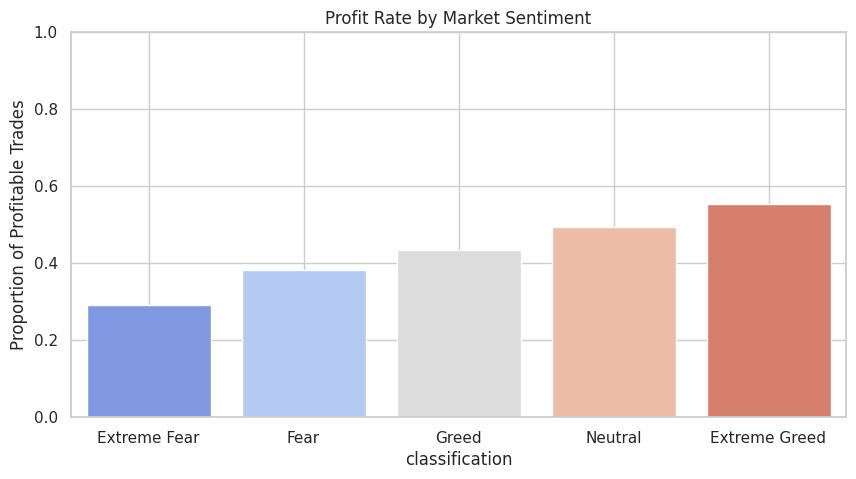

/tmp/ipython-input-10-529861250.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=normalized_pnl_by_sentiment.index, y=normalized_pnl_by_sentiment.values, palette='viridis')


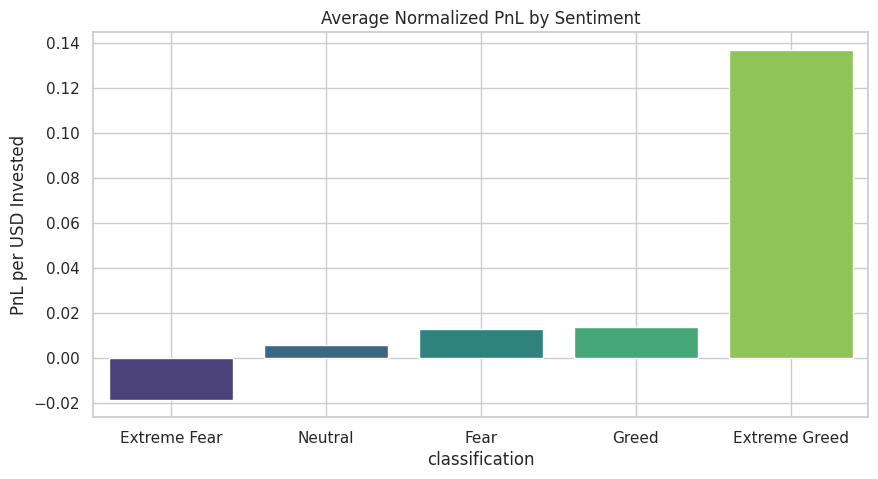

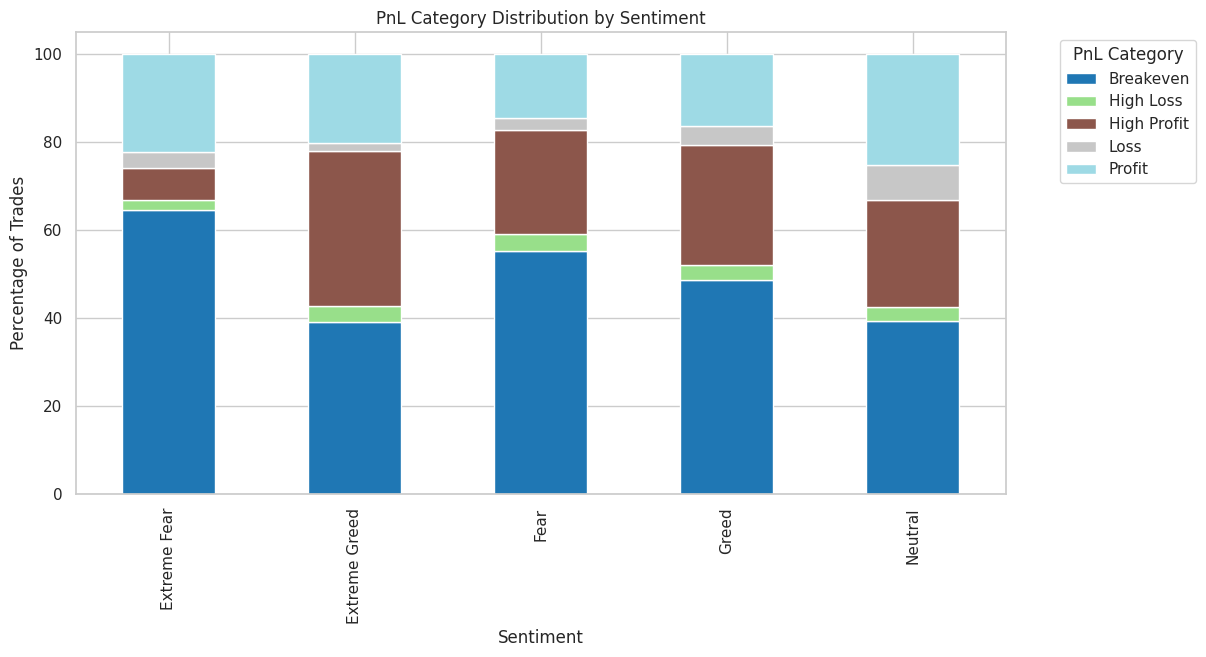

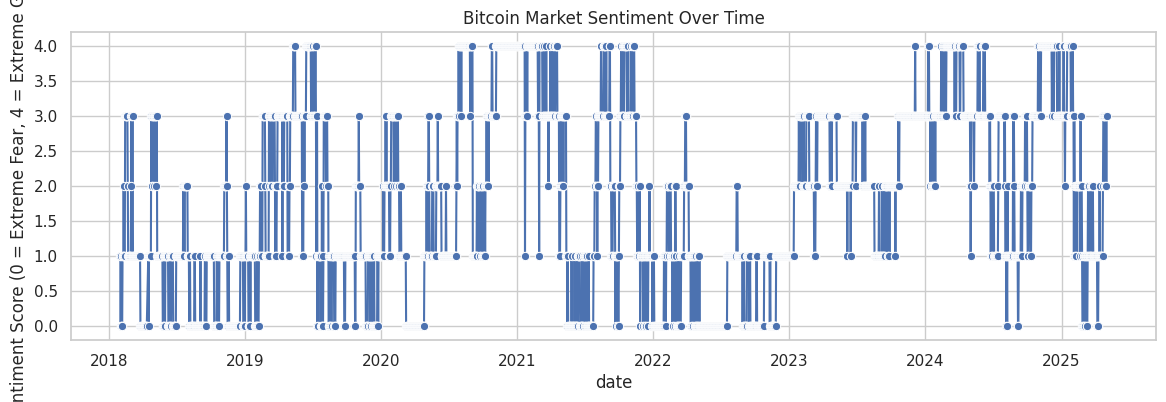

In [10]:
## A. Profit Rate by Sentiment
profit_by_sentiment = merged_df.groupby('classification')['is_profitable'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=profit_by_sentiment.index, y=profit_by_sentiment.values, palette='coolwarm')
plt.title('Profit Rate by Market Sentiment')
plt.ylabel('Proportion of Profitable Trades')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

## B. Normalized PnL by Sentiment
normalized_pnl_by_sentiment = merged_df.groupby('classification')['normalized_pnl'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=normalized_pnl_by_sentiment.index, y=normalized_pnl_by_sentiment.values, palette='viridis')
plt.title('Average Normalized PnL by Sentiment')
plt.ylabel('PnL per USD Invested')
plt.grid(True)
plt.show()

## C. PnL Category Distribution
pnl_category_dist = pd.crosstab(merged_df['classification'], merged_df['pnl_category'], normalize='index') * 100

pnl_category_dist.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12,6))
plt.title('PnL Category Distribution by Sentiment')
plt.ylabel('Percentage of Trades')
plt.xlabel('Sentiment')
plt.legend(title='PnL Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## D. Sentiment Timeline
sentiment_df['sentiment_score'] = sentiment_df['classification'].map(sentiment_map)
sentiment_df_plot = sentiment_df.sort_values('date')

plt.figure(figsize=(14, 4))
sns.lineplot(x=sentiment_df_plot['date'], y=sentiment_df_plot['sentiment_score'], marker='o')
plt.title('Bitcoin Market Sentiment Over Time')
plt.ylabel('Sentiment Score (0 = Extreme Fear, 4 = Extreme Greed)')
plt.grid(True)
plt.show()




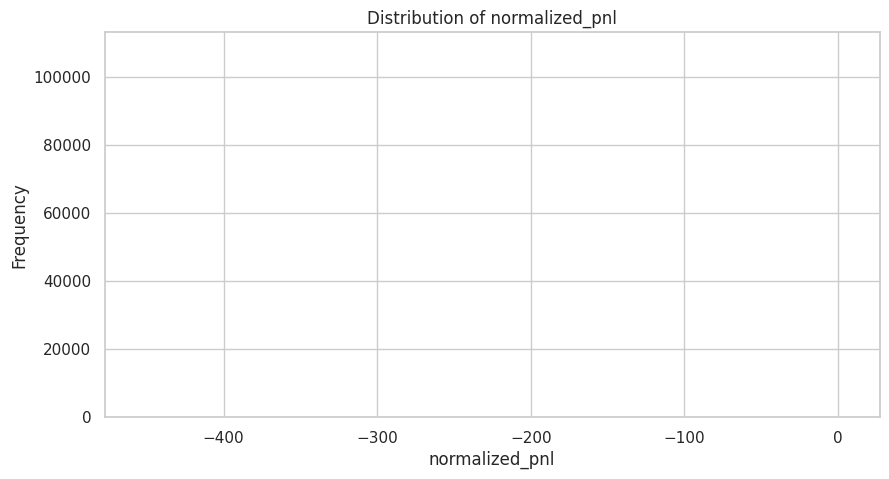

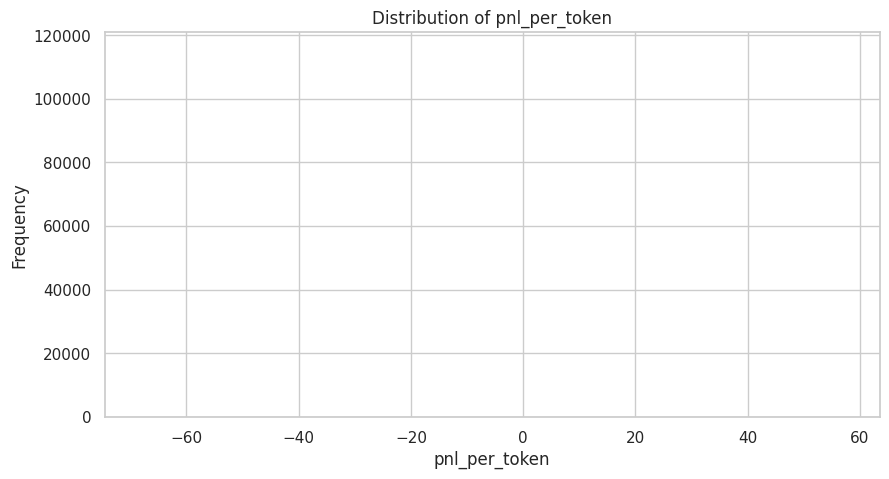

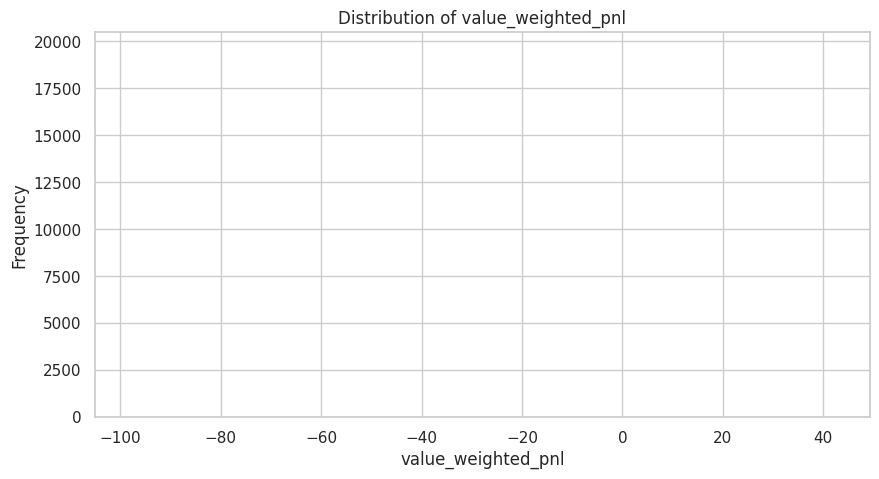

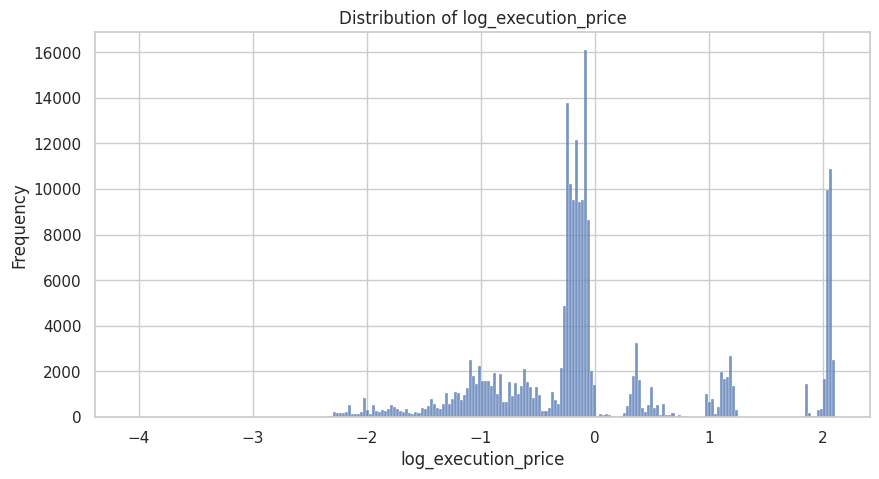

In [12]:
# E. Distribution of Engineered Features
engineered_features = ['normalized_pnl', 'pnl_per_token', 'value_weighted_pnl', 'log_execution_price']

for feature in engineered_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(merged_df[feature].dropna()) # Removed kde=True
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


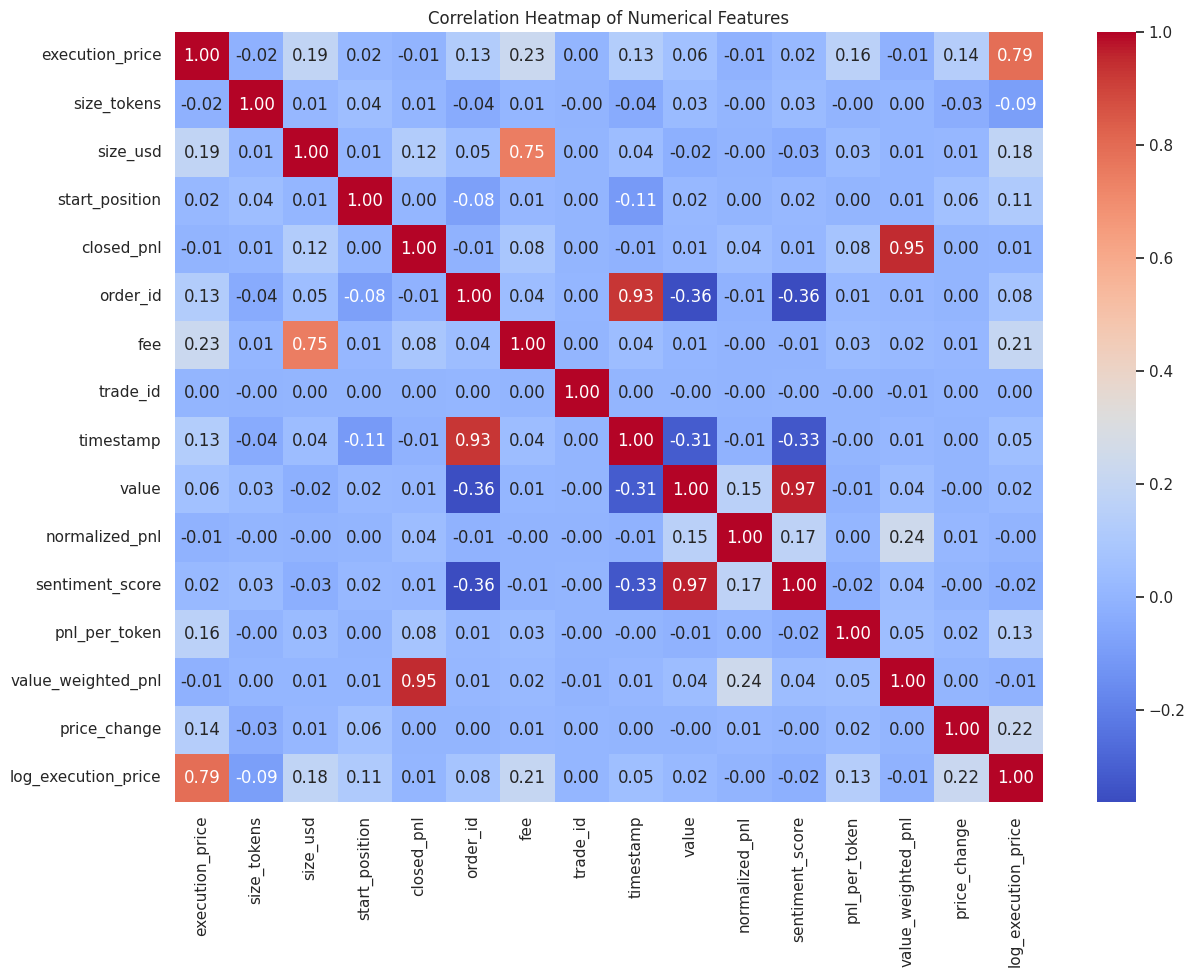

In [13]:
# F. Correlation Heatmap of Numerical Features
# only numerical columns for correlation analysis
numerical_df = merged_df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

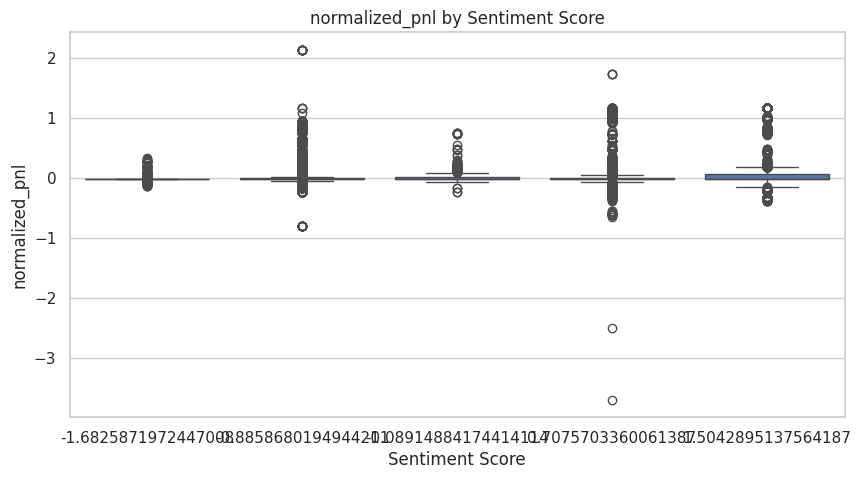

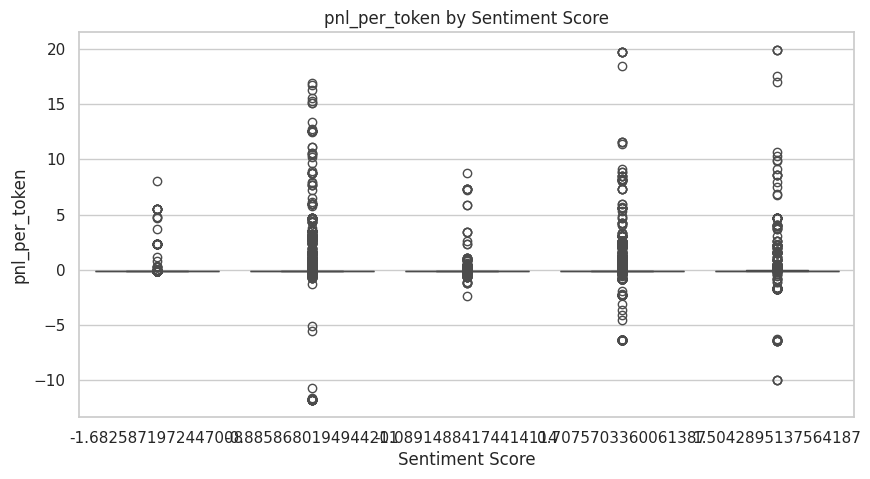

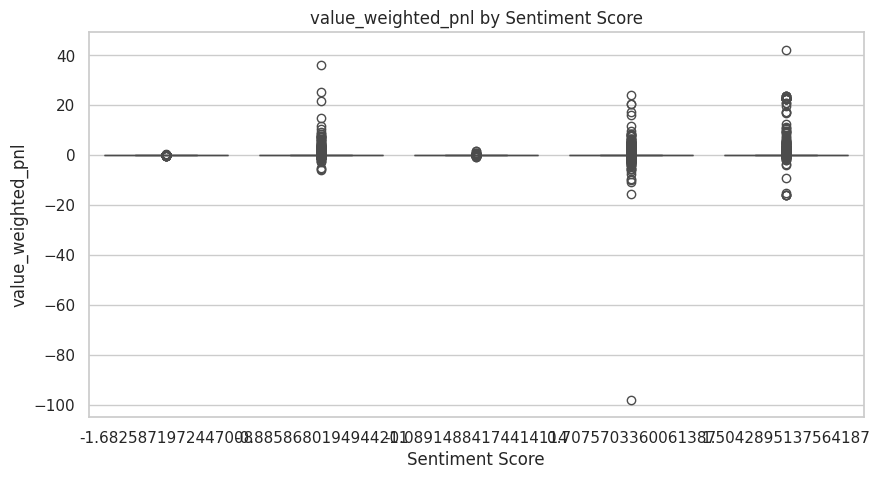

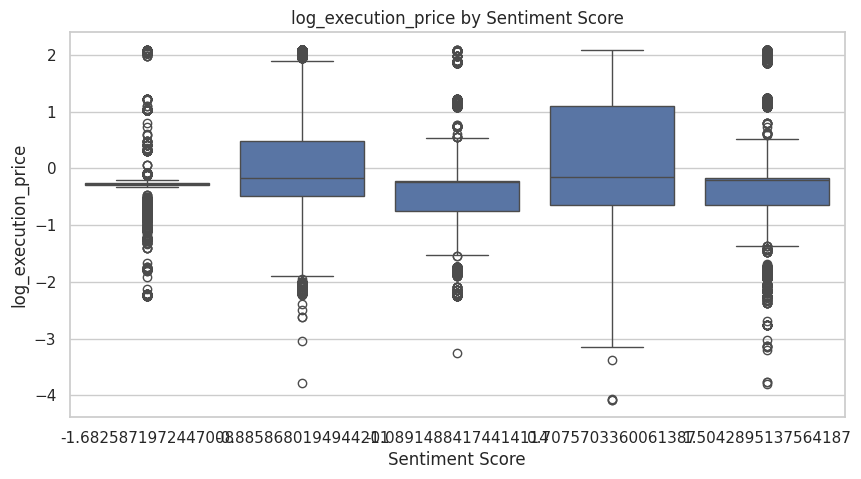

In [14]:
# G. Relationship between Sentiment Score and Engineered Features
for feature in engineered_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='sentiment_score', y=feature, data=merged_df)
    plt.title(f'{feature} by Sentiment Score')
    plt.xlabel('Sentiment Score')
    plt.ylabel(feature)
    plt.show()

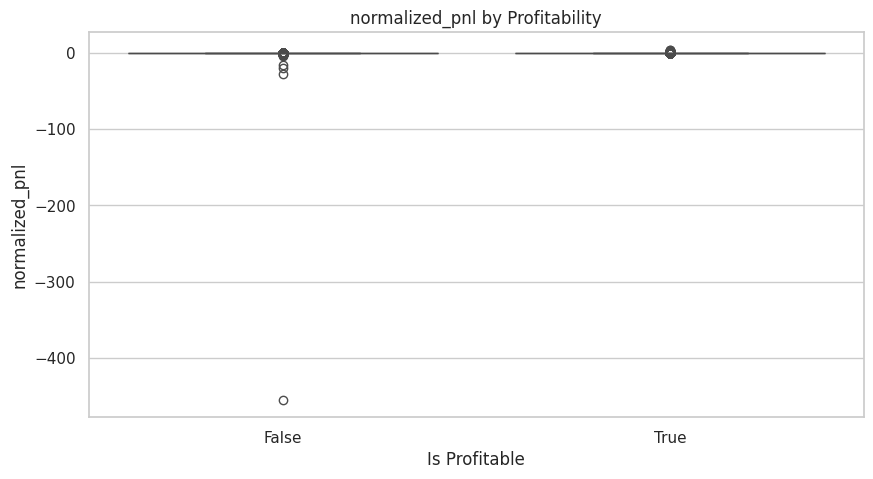

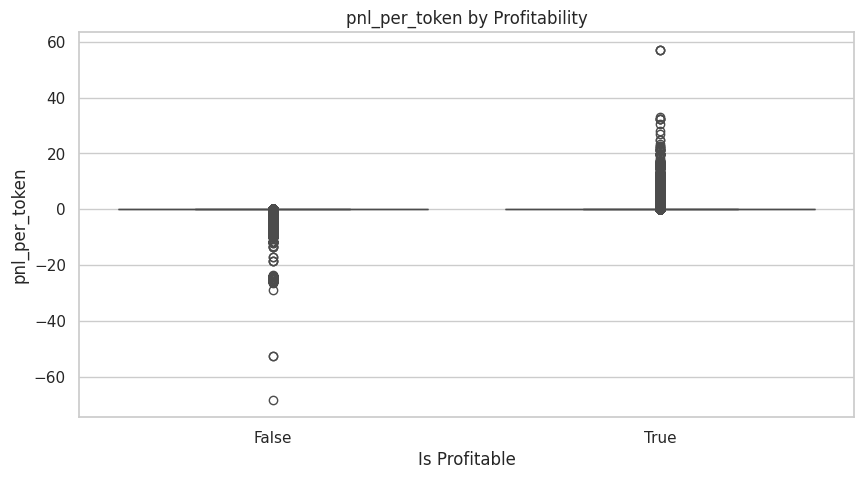

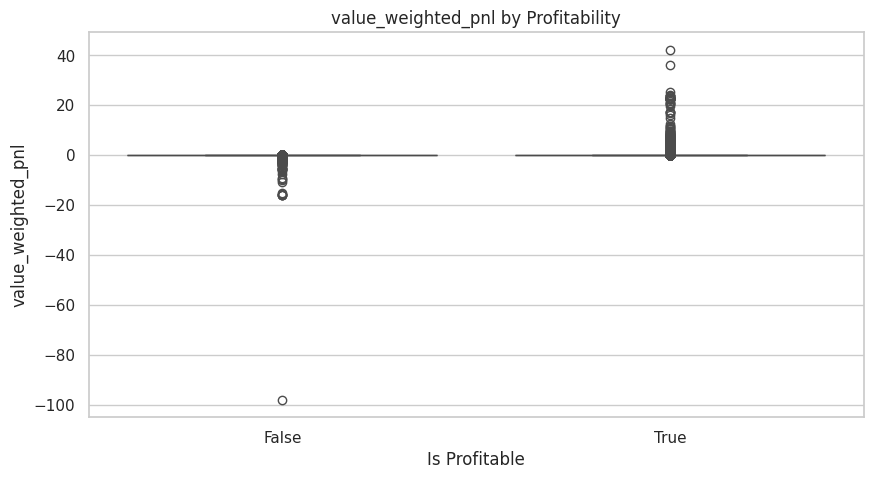

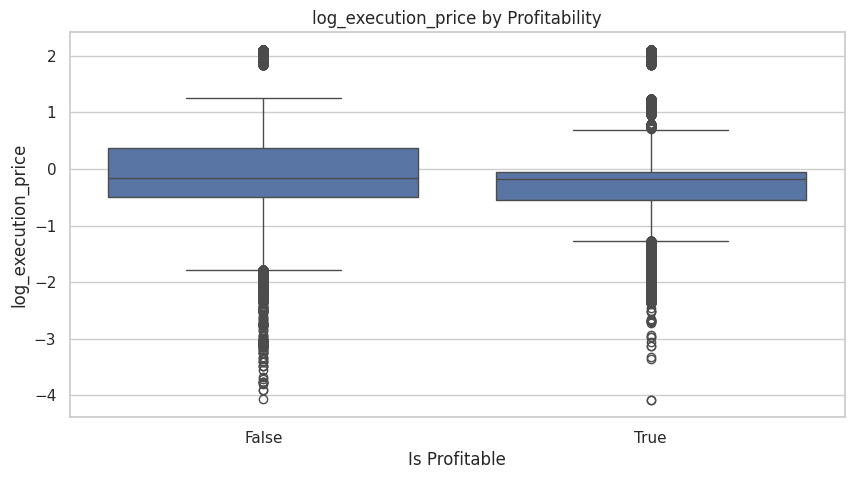

In [15]:
# H. Relationship between Profitability and Engineered Features
for feature in engineered_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='is_profitable', y=feature, data=merged_df)
    plt.title(f'{feature} by Profitability')
    plt.xlabel('Is Profitable')
    plt.ylabel(feature)
    plt.show()

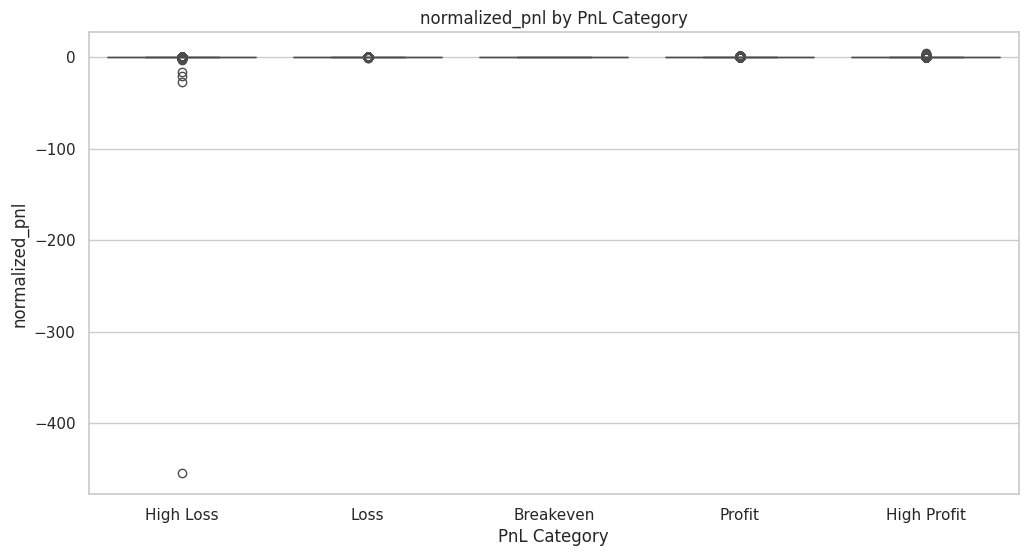

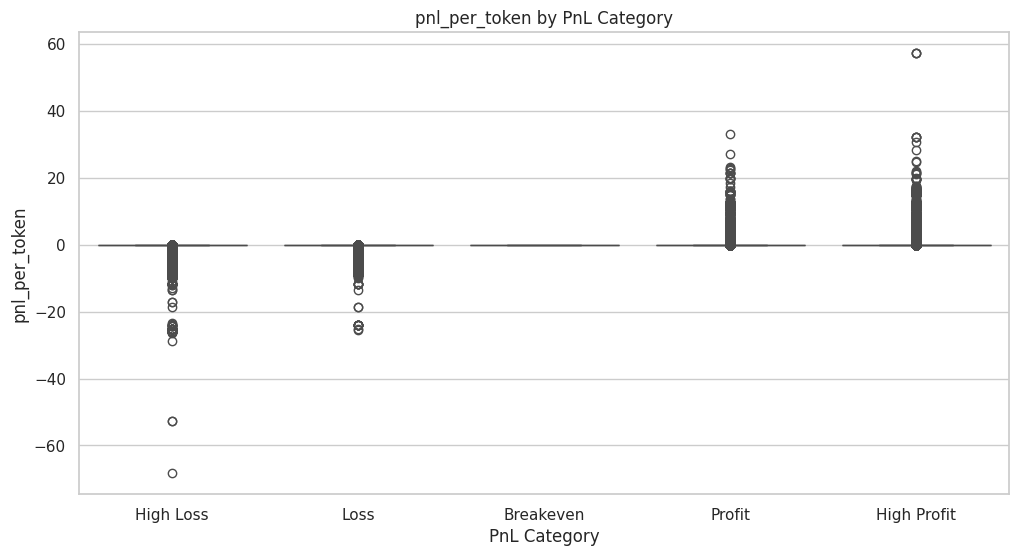

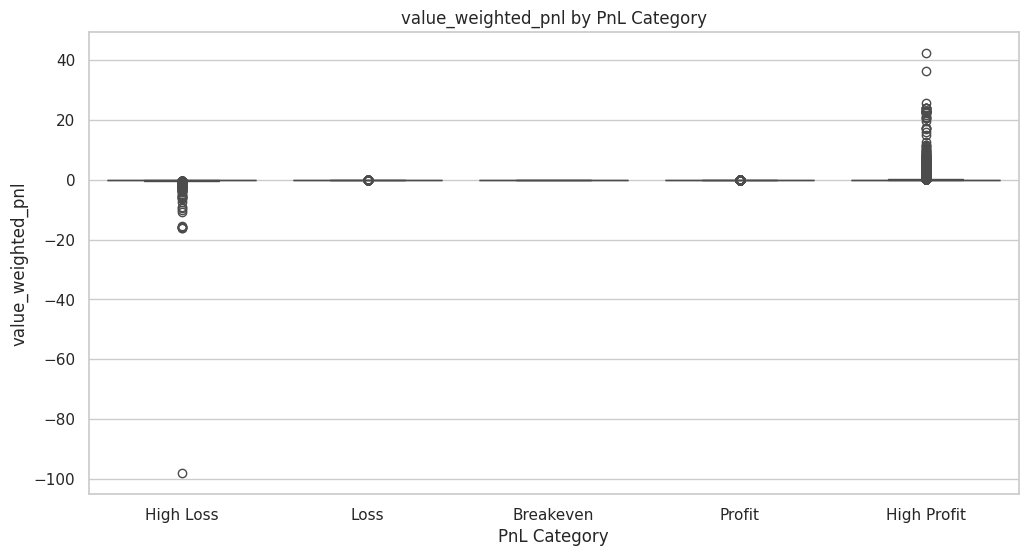

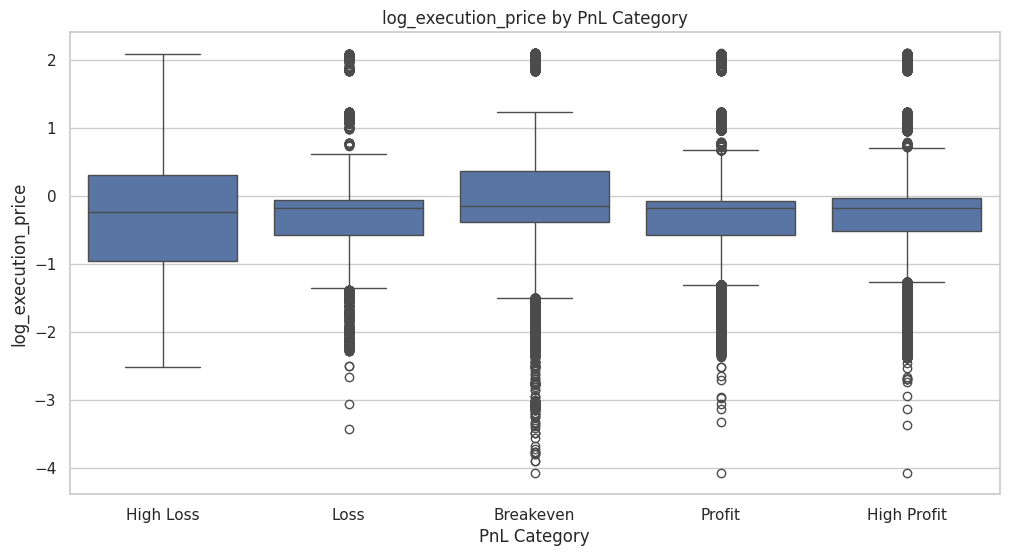

In [16]:
# I. Relationship between PnL Category and Engineered Features
for feature in engineered_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='pnl_category', y=feature, data=merged_df, order=['High Loss', 'Loss', 'Breakeven', 'Profit', 'High Profit'])
    plt.title(f'{feature} by PnL Category')
    plt.xlabel('PnL Category')
    plt.ylabel(feature)
    plt.show()


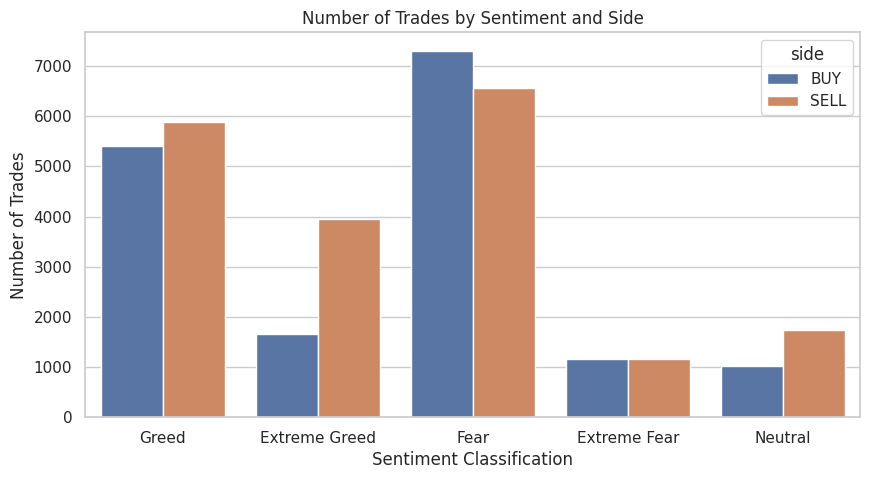

In [17]:
# J. Count of Trades by Sentiment and Side
plt.figure(figsize=(10, 5))
sns.countplot(x='classification', hue='side', data=merged_df)
plt.title('Number of Trades by Sentiment and Side')
plt.xlabel('Sentiment Classification')
plt.ylabel('Number of Trades')
plt.show()

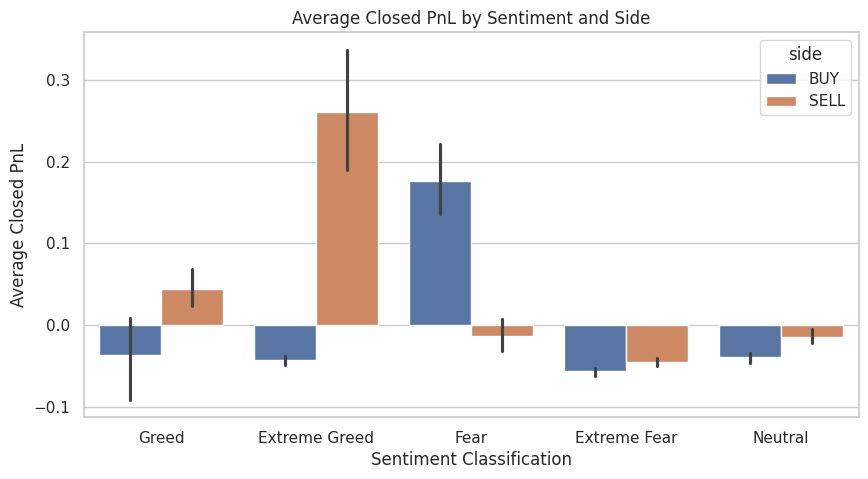

In [18]:
# K. Average PnL by Sentiment and Side
plt.figure(figsize=(10, 5))
sns.barplot(x='classification', y='closed_pnl', hue='side', data=merged_df)
plt.title('Average Closed PnL by Sentiment and Side')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.show()